In [1]:
#importing libraries
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix, precision_recall_fscore_support, confusion_matrix

#importing dataset
df = pd.read_csv('data.csv')

In [2]:
#dropping the column URL, and headline
df = df.drop(['URLs'], axis=1)

In [3]:
df = df.drop(['Headline'], axis=1)

In [4]:
#displaying top 5 values in dataset
df.head()

,Body,Label
0,Image copyright Getty Images\nOn Sunday mornin...,1
1,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,The feud broke into public view last week when...,1
3,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,"Country singer Jason Aldean, who was performin...",1


In [5]:
#helper function for preproccessing data
'''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
def review_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [6]:
#making a copy of dataset
clean_news=df.copy()

In [7]:
#applying preprocessing
clean_news['Body']=clean_news['Body'].apply(lambda x:review_cleaning(x))
clean_news.head()

,Body,Label
0,image copyright getty imageson sunday morning ...,1
1,london reuters “last flag flying” a comedydra...,1
2,the feud broke into public view last week when...,1
3,mexico city reuters egypt’s cheiron holdings ...,1
4,country singer jason aldean who was performing...,1


In [8]:
#removing stopwords
stop = stopwords.words('english')
clean_news['Body'] = clean_news['Body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

,Body,Label
0,image copyright getty imageson sunday morning ...,1
1,london reuters “last flag flying” comedydrama ...,1
2,feud broke public view last week mr corker sai...,1
3,mexico city reuters egypt’s cheiron holdings l...,1
4,country singer jason aldean performing las veg...,1


In [9]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(clean_news)):
    news = ''.join(clean_news['Body'][i])
    corpus.append(news)   

## Unigram

In [58]:
#extracting unigram features
cv1 = CountVectorizer(ngram_range=(1,1)).fit(clean_news['Body'])

X1= cv1.fit(corpus)
X1 = cv1.transform(corpus)
X1 = cv1.fit_transform(corpus)

#making a dataframe of those extracted features
data1 = pd.DataFrame(X1.toarray(),columns = cv1.get_feature_names())


{'image': 31066, 'copyright': 14071, 'getty': 26281, 'imageson': 31144, 'sunday': 64714, 'morning': 42079, 'donald': 18720, 'trump': 69066, 'went': 73284, 'twitter': 69526, 'tirade': 67808, 'member': 40288, 'partythis': 47646, 'isnt': 33355, 'exactly': 21677, 'huge': 30485, 'news': 43596, 'far': 22702, 'first': 23705, 'time': 67597, 'president': 50859, 'turned': 69393, 'rhetorical': 55740, 'cannons': 9505, 'ranksthis': 52947, 'however': 30400, 'attacks': 4428, 'particularly': 47564, 'biting': 7013, 'personal': 48492, 'essentially': 21284, 'called': 9230, 'tennessee': 66372, 'senator': 59333, 'bob': 7411, 'corker': 14113, 'chair': 10515, 'powerful': 50423, 'senate': 59322, 'foreign': 24460, 'relations': 54167, 'committee': 12718, 'coward': 14656, 'running': 56871, 'reelectionhe': 53774, 'said': 57187, 'mr': 42382, 'begged': 6166, 'presidents': 50888, 'endorsement': 20646, 'refused': 53917, 'give': 26466, 'wrongly': 74521, 'claimed': 11565, 'corkers': 14115, 'support': 64903, 'iranian': 

(4009, 75568)


In [59]:
data1.head()

,aa,aaa,aakash,aall,aalo,aamir,aapglenn,aaplo,aaploq,aapmorgan,...,½no,½the,½two,álvaro,école,émigrés,ðÿ,œbrilliant,əˈnänəməs,ʺhe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
y = clean_news['Label']

In [61]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.25, random_state=42)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3006, 75568)
(1003, 75568)
(3006,)
(1003,)


In [63]:
#applying logistic regression
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision-recall-f1 --- macro", precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("precision-recall-f1 --- micro",precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("precision-recall-f1 --- weighted",precision_recall_fscore_support(y_test, y_pred, average='weighted'))

accuracy 0.9700897308075773
precision-recall-f1 --- macro (0.9697188654789028, 0.9697188654789028, 0.9697188654789028, None)
precision-recall-f1 --- micro (0.9700897308075773, 0.9700897308075773, 0.9700897308075773, None)
precision-recall-f1 --- weighted (0.9700897308075773, 0.9700897308075773, 0.9700897308075773, None)


[[542  15]
 [ 15 431]]


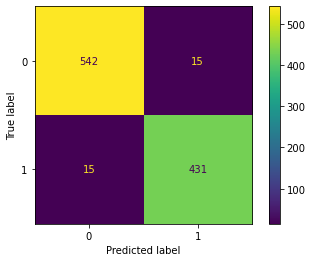

In [64]:
#plotting confusion matrix
import matplotlib.pyplot as plt
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [65]:
#applying decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision-recall-f1 --- macro", precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("precision-recall-f1 --- micro",precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("precision-recall-f1 --- weighted",precision_recall_fscore_support(y_test, y_pred, average='weighted'))

accuracy 0.9242273180458624
precision-recall-f1 --- macro (0.9236253942136294, 0.9228409722166313, 0.9232179406598011, None)
precision-recall-f1 --- micro (0.9242273180458624, 0.9242273180458624, 0.9242273180458624, None)
precision-recall-f1 --- weighted (0.9241868525781493, 0.9242273180458624, 0.9241922092672168, None)


[[521  36]
 [ 40 406]]


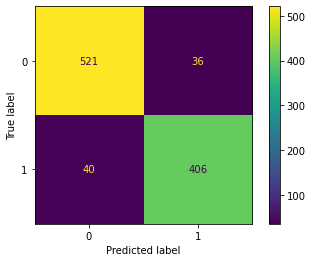

In [66]:
#plotting confusion matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(dt, X_test, y_test)  
plt.show()

In [69]:
#applying random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=100).fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision-recall-f1 --- macro", precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("precision-recall-f1 --- micro",precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("precision-recall-f1 --- weighted",precision_recall_fscore_support(y_test, y_pred, average='weighted'))

accuracy 0.9551345962113659
precision-recall-f1 --- macro (0.9536306863893071, 0.9584879761051759, 0.9548755140052367, None)
precision-recall-f1 --- micro (0.9551345962113659, 0.9551345962113659, 0.9551345962113659, None)
precision-recall-f1 --- weighted (0.9577022471270761, 0.9551345962113659, 0.9552539103852412, None)


[[517  40]
 [  5 441]]


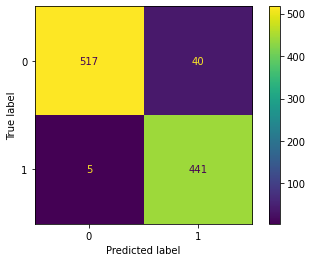

In [70]:
#plotting confusion matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

## Bigram

In [27]:
#extracting bigram features
cv1 = CountVectorizer(ngram_range=(2,2), max_features= 75568).fit(clean_news['Body'])

X1= cv1.fit(corpus)
X1 = cv1.transform(corpus)
X1 = cv1.fit_transform(corpus)

data1 = pd.DataFrame(X1.toarray(),columns = cv1.get_feature_names())


(4009, 75568)


In [28]:
data1.head()

,aaa franchise,aapglenn campbellvia,aaron hicks,aaron jones,aaron judge,aaron kesel,aaron keselamid,aaron keselas,aaron keseltensions,aaron keselthe,...,zone time,zones privacy,zones syria,zublick unseals,zuckerberg said,zuerlein los,zurcher bbc,zurich november,zurich reuters,zuricheurope playoff
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y = clean_news['Label']

In [30]:
#data split
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.25, random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3006, 75568)
(1003, 75568)
(3006,)
(1003,)


In [32]:
#applying logistic regression
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision-recall-f1 --- macro", precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("precision-recall-f1 --- micro",precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("precision-recall-f1 --- weighted",precision_recall_fscore_support(y_test, y_pred, average='weighted'))

accuracy 0.9690927218344965
precision-recall-f1 --- macro (0.9674578164266624, 0.9717255315551763, 0.9688744115088498, None)
precision-recall-f1 --- micro (0.9690927218344965, 0.9690927218344965, 0.9690927218344965, None)
precision-recall-f1 --- weighted (0.9706415795892868, 0.9690927218344965, 0.9691628930105973, None)


[[528  29]
 [  2 444]]


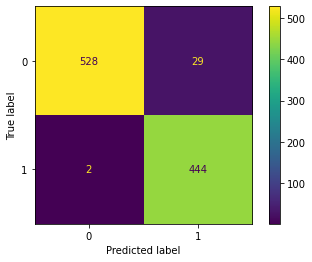

In [33]:
#plot confusion matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [34]:
#apply decision tree
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision-recall-f1 --- macro", precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("precision-recall-f1 --- micro",precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("precision-recall-f1 --- weighted",precision_recall_fscore_support(y_test, y_pred, average='weighted'))

accuracy 0.9431704885343968
precision-recall-f1 --- macro (0.9477666535148287, 0.9385561665230937, 0.9419402798638763, None)
precision-recall-f1 --- micro (0.9431704885343968, 0.9431704885343968, 0.9431704885343968, None)
precision-recall-f1 --- weighted (0.9449480109025197, 0.9431704885343968, 0.9428755754969432, None)


[[546  11]
 [ 46 400]]


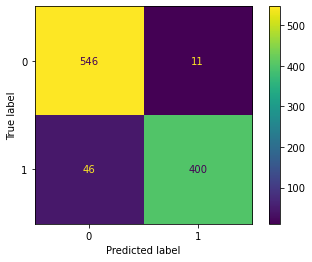

In [35]:
#plot confusion matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(dt, X_test, y_test)  
plt.show()

In [36]:
#apply random forest
rf = RandomForestClassifier(max_depth=100).fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision-recall-f1 --- macro", precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("precision-recall-f1 --- micro",precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("precision-recall-f1 --- weighted",precision_recall_fscore_support(y_test, y_pred, average='weighted'))

accuracy 0.9122632103688934
precision-recall-f1 --- macro (0.9171715115815016, 0.9207819758314482, 0.9122086685286417, None)
precision-recall-f1 --- micro (0.9122632103688934, 0.9122632103688934, 0.9122632103688934, None)
precision-recall-f1 --- weighted (0.9261030105093624, 0.9122632103688934, 0.9124508342993586, None)


[[470  87]
 [  1 445]]


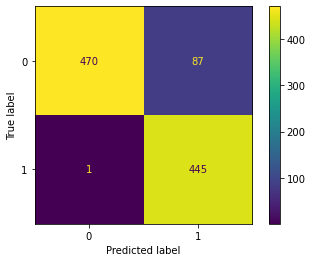

In [37]:
#plotting confusion matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

## Trigram

In [38]:
#extracting trigram features
cv1 = CountVectorizer(ngram_range=(3,3), max_features= 75568).fit(clean_news['Body'])

X1= cv1.fit(corpus)
X1 = cv1.transform(corpus)
X1 = cv1.fit_transform(corpus)

data1 = pd.DataFrame(X1.toarray(),columns = cv1.get_feature_names())


(4009, 75568)


In [39]:
data1.head()

,aaron jones green,aaron kesel writes,aaron keselamid kneeling,aaron keselas former,aaron keseltensions rising,aaron keselthe us,aaron rodgers gb,aaron rodgers green,aaron rodgers sacked,aaron rouse said,...,zone finance ministers,zone home game,zone nfl game,zone plenty green,zones privacy entirely,zublick unseals horrible,zuerlein los angeles,zurcher bbc north,zurich november playoff,zuricheurope playoff draw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y = clean_news['Label']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.25, random_state=42)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3006, 75568)
(1003, 75568)
(3006,)
(1003,)


In [43]:
#applying logistic regression
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision-recall-f1 --- macro", precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("precision-recall-f1 --- micro",precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("precision-recall-f1 --- weighted",precision_recall_fscore_support(y_test, y_pred, average='weighted'))

accuracy 0.9491525423728814
precision-recall-f1 --- macro (0.948692152917505, 0.9542190305206464, 0.9489699314351727, None)
precision-recall-f1 --- micro (0.9491525423728814, 0.9491525423728814, 0.9491525423728814, None)
precision-recall-f1 --- weighted (0.954370289533813, 0.9491525423728814, 0.9493077616699338, None)


[[506  51]
 [  0 446]]


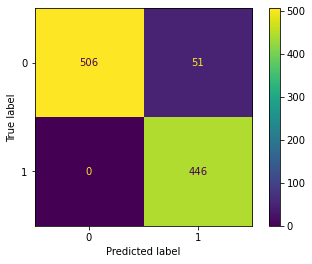

In [44]:
#plotting confusion matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [45]:
#applying decision tree
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision-recall-f1 --- macro", precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("precision-recall-f1 --- micro",precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("precision-recall-f1 --- weighted",precision_recall_fscore_support(y_test, y_pred, average='weighted'))

accuracy 0.9431704885343968
precision-recall-f1 --- macro (0.9418282052302671, 0.9468223426266595, 0.9428761271950641, None)
precision-recall-f1 --- micro (0.9431704885343968, 0.9431704885343968, 0.9431704885343968, None)
precision-recall-f1 --- weighted (0.9463431581623397, 0.9431704885343968, 0.9433299342598687, None)


[[509  48]
 [  9 437]]


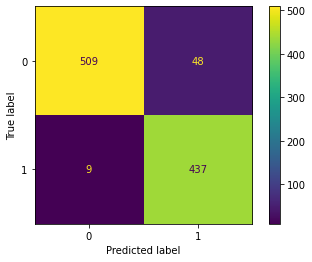

In [46]:
#plotting confusion matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(dt, X_test, y_test)  
plt.show()

In [47]:
#applying random forest
rf = RandomForestClassifier(max_depth=100).fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision-recall-f1 --- macro", precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("precision-recall-f1 --- micro",precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("precision-recall-f1 --- weighted",precision_recall_fscore_support(y_test, y_pred, average='weighted'))

accuracy 0.8803589232303091
precision-recall-f1 --- macro (0.8939929328621908, 0.8922800718132855, 0.8803492894123635, None)
precision-recall-f1 --- micro (0.8803589232303091, 0.8803589232303091, 0.8803589232303091, None)
precision-recall-f1 --- weighted (0.9057245225454379, 0.8803589232303091, 0.8802304723243682, None)


[[437 120]
 [  0 446]]


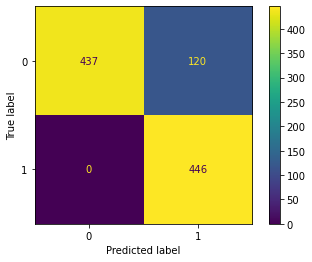

In [48]:
#plotting confusion matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

## Tfidf

In [49]:
#applying tfidf to extract features
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(corpus)
data2 = pd.DataFrame(pd.DataFrame(features.todense(),columns=tfidf.get_feature_names()))

In [50]:
data2.head()

,aa,aaa,aakash,aall,aalo,aamir,aapglenn,aaplo,aaploq,aapmorgan,...,½no,½the,½two,álvaro,école,émigrés,ðÿ,œbrilliant,əˈnänəməs,ʺhe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
y = clean_news['Label']
X_train, X_test, y_train, y_test = train_test_split(data2, y, test_size=0.25, random_state=42)

In [52]:
#applying logistic regression
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision-recall-f1 --- macro", precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("precision-recall-f1 --- micro",precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("precision-recall-f1 --- weighted",precision_recall_fscore_support(y_test, y_pred, average='weighted'))

accuracy 0.9541375872382851
precision-recall-f1 --- macro (0.9525302283922974, 0.9555796185523022, 0.9537398732654208, None)
precision-recall-f1 --- micro (0.9541375872382851, 0.9541375872382851, 0.9541375872382851, None)
precision-recall-f1 --- weighted (0.9549091194843593, 0.9541375872382851, 0.9542145641362589, None)


[[525  32]
 [ 14 432]]


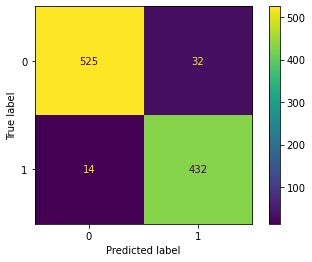

In [53]:
#plotting confusion matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [54]:
#applying decision tree
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision-recall-f1 --- macro", precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("precision-recall-f1 --- micro",precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("precision-recall-f1 --- weighted",precision_recall_fscore_support(y_test, y_pred, average='weighted'))

accuracy 0.9292123629112662
precision-recall-f1 --- macro (0.9285895678813286, 0.9279995330526282, 0.9282859338195975, None)
precision-recall-f1 --- micro (0.9292123629112662, 0.9292123629112662, 0.9292123629112662, None)
precision-recall-f1 --- weighted (0.9291804247046027, 0.9292123629112662, 0.9291879831983275, None)


[[523  34]
 [ 37 409]]


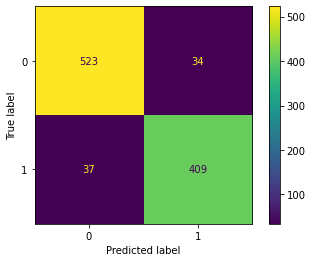

In [55]:
#plotting confusion matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(dt, X_test, y_test)  
plt.show()

In [56]:
#applying random forest classifier
rf = RandomForestClassifier(max_depth=100).fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision-recall-f1 --- macro", precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("precision-recall-f1 --- micro",precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("precision-recall-f1 --- weighted",precision_recall_fscore_support(y_test, y_pred, average='weighted'))

accuracy 0.9521435692921236
precision-recall-f1 --- macro (0.950539948196852, 0.9551247474056243, 0.951844828000096, None)
precision-recall-f1 --- micro (0.9521435692921236, 0.9521435692921236, 0.9521435692921236, None)
precision-recall-f1 --- weighted (0.9543272235495147, 0.9521435692921236, 0.9522645784230713, None)


[[517  40]
 [  8 438]]


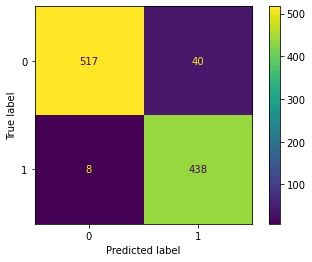

In [57]:
#plotting confusion matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

## sequence padding

In [71]:
#setting x and y values
X = clean_news['Body']
y = clean_news['Label']

In [72]:
#parameters, to determine the vocabulary and tokenize and pad them
vocab_size = 1000
embedding_dim = 16
max_length = 600
trunc_type='post'
oov_tok = "<OOV>"
padding_type='post'


training_sentences = X[0:4009]
training_labels = y[0:4009]

In [73]:
training_sentences

0       image copyright getty imageson sunday morning ...
1       london reuters “last flag flying” comedydrama ...
2       feud broke public view last week mr corker sai...
3       mexico city reuters egypt’s cheiron holdings l...
4       country singer jason aldean performing las veg...
                              ...                        
4004    trends watch readers think story fact add two ...
4005    trump jr soon give speech readers think story ...
4006                                                  nan
4007    shanghai reuters china said plans accept data ...
4008    vice president mike pence leaves nfl game anti...
Name: Body, Length: 4009, dtype: object

In [74]:
#applying tokenizer; oov_token means if the word doesnt exist in the vocab then apply/replace it with "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [75]:
word_index = tokenizer.word_index

In [76]:
#making sequences, every news is of different length. Therefore we have to pad them to make them of equal length
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [77]:
type(training_padded)

numpy.ndarray

In [78]:
#converting it to a dataframe
df_seq_pad = pd.DataFrame(training_padded)

In [79]:
y = clean_news['Label']

In [80]:
df_seq_pad

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,174,268,986,1,143,576,231,18,159,133,...,0,0,0,0,0,0,0,0,0,0
1,653,85,1,310,1,1,1,195,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,122,256,14,20,17,950,2,17,...,7,420,30,17,18,1,1,417,1,1
3,505,119,85,1,1,1,869,271,1,1,...,0,0,0,0,0,0,0,0,0,0
4,98,1,1,1,1,191,157,225,480,536,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,1,398,217,39,54,93,162,9,355,1,...,0,0,0,0,0,0,0,0,0,0
4005,18,1,798,221,851,217,39,54,93,162,...,0,0,0,0,0,0,0,0,0,0
4006,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4007,1,85,315,2,442,1,152,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [81]:
#data split
X_train, X_test, y_train, y_test = train_test_split(df_seq_pad, y, test_size=0.25, random_state=42)

In [82]:
#apply logistic regression
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision-recall-f1 --- macro", precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("precision-recall-f1 --- micro",precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("precision-recall-f1 --- weighted",precision_recall_fscore_support(y_test, y_pred, average='weighted'))

accuracy 0.654037886340977
precision-recall-f1 --- macro (0.6493261291889267, 0.6485194547986892, 0.6488424769832262, None)
precision-recall-f1 --- micro (0.654037886340977, 0.654037886340977, 0.654037886340977, None)
precision-recall-f1 --- weighted (0.653258497939886, 0.654037886340977, 0.6535694477923274, None)


D:\Users\abuba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[389 168]
 [179 267]]


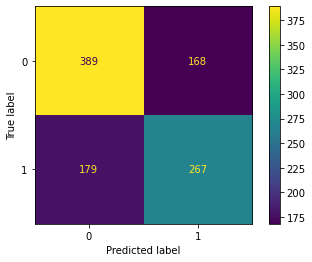

In [83]:
#plotting confusion matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [84]:
#applying decision tree
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision-recall-f1 --- macro", precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("precision-recall-f1 --- micro",precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("precision-recall-f1 --- weighted",precision_recall_fscore_support(y_test, y_pred, average='weighted'))

accuracy 0.7806580259222333
precision-recall-f1 --- macro (0.7781762212190346, 0.7768212960204812, 0.7774186780287441, None)
precision-recall-f1 --- micro (0.7806580259222333, 0.7806580259222333, 0.7806580259222333, None)
precision-recall-f1 --- weighted (0.7802791244408288, 0.7806580259222333, 0.780390311220292, None)


[[452 105]
 [115 331]]


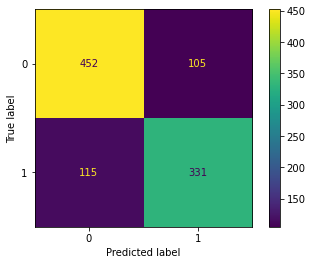

In [85]:
#plotting confusion matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(dt, X_test, y_test)  
plt.show()

In [86]:
#applying random forest
rf = RandomForestClassifier(max_depth=100).fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision-recall-f1 --- macro", precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("precision-recall-f1 --- micro",precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("precision-recall-f1 --- weighted",precision_recall_fscore_support(y_test, y_pred, average='weighted'))

accuracy 0.8484546360917248
precision-recall-f1 --- macro (0.8543590358556181, 0.8568524526813246, 0.848400235470065, None)
precision-recall-f1 --- micro (0.8484546360917248, 0.8484546360917248, 0.8484546360917248, None)
precision-recall-f1 --- weighted (0.8633369587842779, 0.8484546360917248, 0.8487180496281826, None)


[[435 122]
 [ 30 416]]


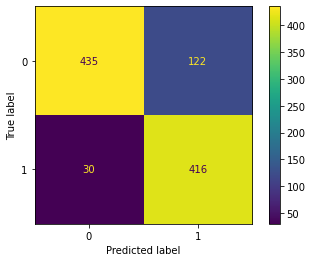

In [87]:
#plotting confusion matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()